<a href="https://colab.research.google.com/github/alexmichelon/growdev-matematica-e-estatistica/blob/main/Growdev_Semana_03_Alex_Michelon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semana 3

 A temperatura máxima do dia em uma cidade foi anotada durante vinte e um dias. Os dados foram tabulados em uma matriz, na qual as linhas correspondem a semana e colunas aos dias, sendo que a coluna 1 corresponde ao domingo. Os dados estão em °C:

```
[30 32 31.5 31 33 34 33]
[32 30 28 29 30.5 31 29]
[33 34 35 35 34.5 34 33]
```

a) Organize uma tabela de frequência para as classes.

b) Para cada semana, faça um gráfico de linha, para acompanhar a evolução da temperatura.

c) Calcule a média de toda a série.

d) Calcule a média para cada semana.

e) Obter o box-plot para toda série e para cada semana

Importando bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Variáveis informadas: organizadas em listas

In [ ]:
dia_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
semana_1 = [30,32,31.5,31,33,34,33]
semana_2 = [32,30,28,29,30.5,31,29]
semana_3 = [33,34,35,35,34.5,34,33]

Criando DataFrame do pandas e exibindo as 5 primeiras linhas

In [ ]:
dados = pd.DataFrame({"Dia_da_Semana": dia_semana, "Semana_1" : semana_1, "Semana_2" : semana_2, "Semana_3" : semana_3})
dados.head()

,Dia_da_Semana,Semana_1,Semana_2,Semana_3
0,Domingo,30.0,32.0,33.0
1,Segunda-feira,32.0,30.0,34.0
2,Terça-feira,31.5,28.0,35.0
3,Quarta-feira,31.0,29.0,35.0
4,Quinta-feira,33.0,30.5,34.5


a) Organize uma tabela de frequência para as classes:

In [ ]:
frequencia = pd.DataFrame(data=semana_1 + semana_2 + semana_3, columns=['Temperatura'])
serie_total = frequencia
contagem = frequencia.value_counts()
frequencia_absoluta = pd.DataFrame(data=contagem, columns=['Frequencia Absoluta']).reset_index()
frequencia = pd.merge(frequencia, frequencia_absoluta, how='inner', on='Temperatura')
frequencia = frequencia.drop_duplicates()
frequencia['Frequencia Relativa'] = frequencia['Frequencia Absoluta'] / frequencia['Frequencia Absoluta'].sum()
frequencia = frequencia.sort_values('Temperatura', ascending=True)
frequencia


,Temperatura,Frequencia Absoluta,Frequencia Relativa
14,28.0,1,0.047619
15,29.0,2,0.095238
0,30.0,2,0.095238
17,30.5,1,0.047619
5,31.0,2,0.095238
4,31.5,1,0.047619
2,32.0,2,0.095238
7,33.0,4,0.190476
11,34.0,3,0.142857
20,34.5,1,0.047619


b) Para cada semana, faça um gráfico de linha, para acompanhar a evolução da temperatura.

- Gráfico Semana 1

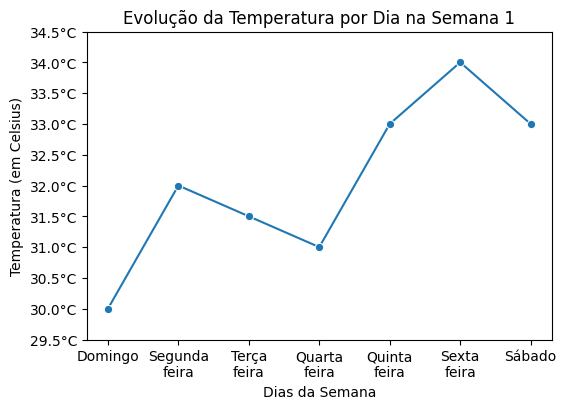

In [ ]:
plt.figure( figsize=(6, 4))
grafico = sns.lineplot(data=dados, x='Dia_da_Semana', y='Semana_1', marker='o')
grafico.set_title('Evolução da Temperatura por Dia na Semana 1')
grafico.set_xlabel('Dias da Semana')
grafico.set_ylabel('Temperatura (em Celsius)')
dias = [dia.replace('-', '\n') for dia in dia_semana]
grafico.set_xticks(dia_semana)
grafico.set_xticklabels(dias)
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
plt.show(grafico);

- Gráfico Semana 2

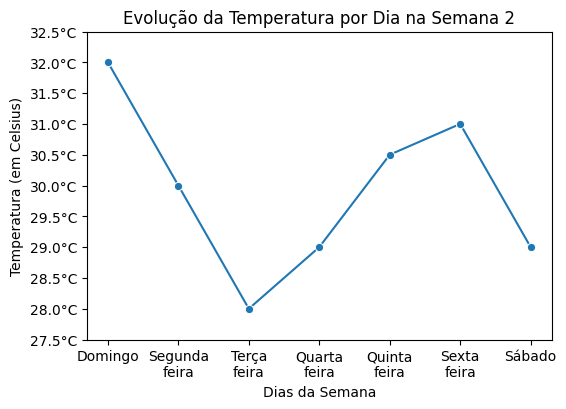

In [ ]:
plt.figure( figsize=(6, 4))
grafico = sns.lineplot(data=dados, x='Dia_da_Semana', y='Semana_2', marker='o', )
grafico.set_title('Evolução da Temperatura por Dia na Semana 2')
grafico.set_xlabel('Dias da Semana')
grafico.set_ylabel('Temperatura (em Celsius)')
dias = [dia.replace('-', '\n') for dia in dia_semana]
grafico.set_xticks(dia_semana)
grafico.set_xticklabels(dias)
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
plt.show(grafico);

- Gráfico Semana 3

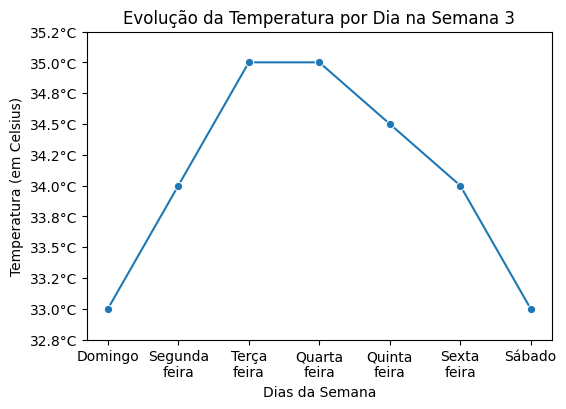

In [ ]:
plt.figure( figsize=(6, 4))
grafico = sns.lineplot(data=dados, x='Dia_da_Semana', y='Semana_3', marker='o')
grafico.set_title('Evolução da Temperatura por Dia na Semana 3')
grafico.set_xlabel('Dias da Semana')
grafico.set_ylabel('Temperatura (em Celsius)')
dias = [dia.replace('-', '\n') for dia in dia_semana]
grafico.set_xticks(dia_semana)
grafico.set_xticklabels(dias)
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
plt.show(grafico);

c) Calcule a média de toda a série.

In [ ]:
media_serie = (dados['Semana_1'].mean() + dados['Semana_2'].mean() + dados['Semana_3'].mean()) / 3
media_serie

32.023809523809526

d) Calcule a média para cada semana.

- Semana 1

In [ ]:
dados['Semana_1'].mean()

32.07142857142857

- Semana 2

In [ ]:
dados['Semana_2'].mean()

29.928571428571427

- Semana 3

In [ ]:
dados['Semana_3'].mean()

34.07142857142857

e) Obter o box-plot para toda série e para cada semana.

- box-plot de toda a série

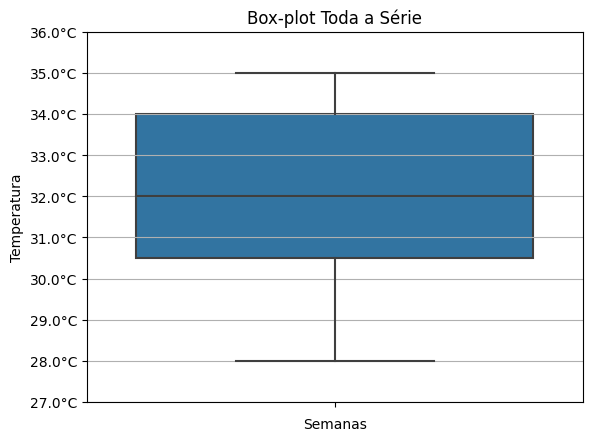

In [ ]:
boxplot = frequencia.boxplot(column=['Temperatura'], grid=True)
grafico = sns.boxplot(data=serie_total, y='Temperatura')
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
grafico.set(xlabel='Semanas', ylabel='Temperatura', title='Box-plot Toda a Série');
plt.show()

- box-plot todas as semanas

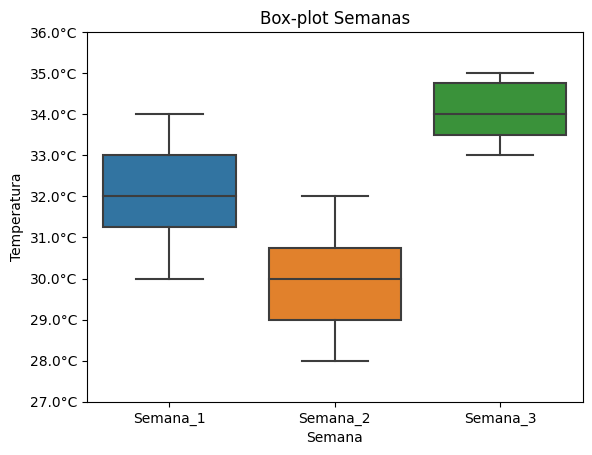

In [ ]:
#boxplot = dados.boxplot(grid=True)
grafico = sns.boxplot(data=dados)
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
grafico.set(xlabel='Semana', ylabel='Temperatura', title='Box-plot Semanas');

- boxplot Semana 1

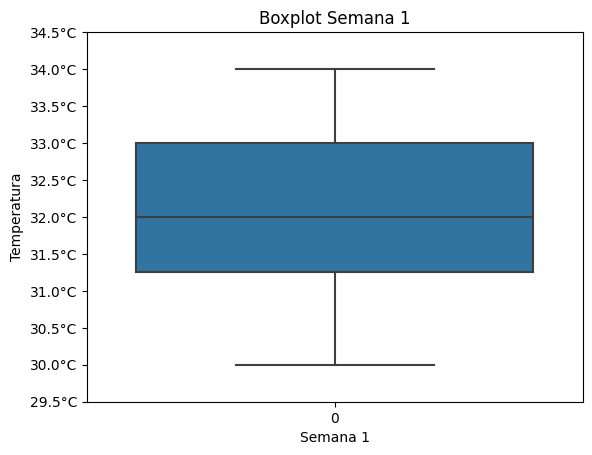

In [ ]:

boxplot = dados.boxplot(column='Semana_1', grid=False)
grafico = sns.boxplot(data=dados['Semana_1'])
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
grafico = grafico.set(xlabel='Semana 1', ylabel='Temperatura', title='Boxplot Semana 1');

- boxplot Semana 2

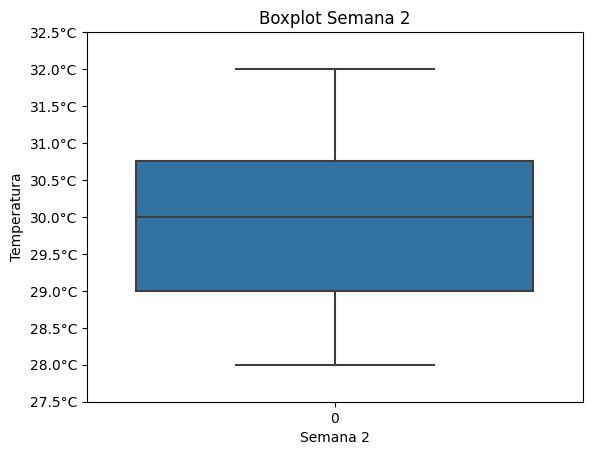

In [ ]:
boxplot = dados.boxplot(column='Semana_2', grid=False)
grafico = sns.boxplot(data=dados['Semana_2'])
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
grafico = grafico.set(xlabel='Semana 2', ylabel='Temperatura', title='Boxplot Semana 2');

- boxplot Semana 3

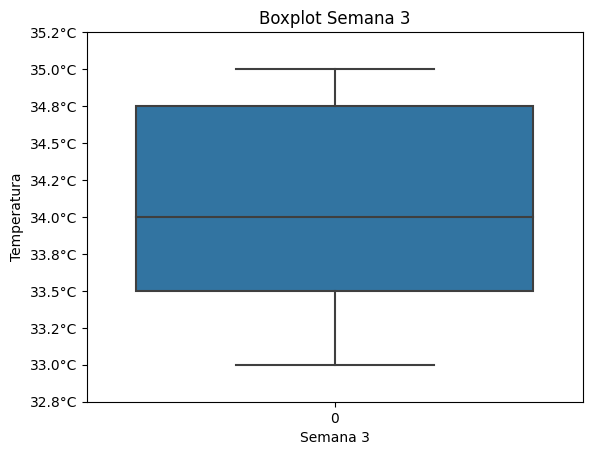

In [ ]:
boxplot = dados.boxplot(column='Semana_3', grid=False)
grafico = sns.boxplot(data=dados['Semana_3'])
temperatura = ['{:,.1f}'.format(dia)  + '°C' for dia in grafico.get_yticks()]
grafico.set_yticks(grafico.get_yticks())
grafico.set_yticklabels(temperatura)
grafico = grafico.set(xlabel='Semana 3', ylabel='Temperatura', title='Boxplot Semana 3');